# Summarize all results from all runs

In [1]:
size=c()
config_time=c()
model_update=c()
reaction_time=c()
privacy_update=c()
total=c()

for (loop in c(1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000)) {
    measurementFile <- sprintf("simulated-account-services-%d.csv", loop)
    if (file.exists(measurementFile)) {
        if (file.size(measurementFile) > 0) {
            #print(sprintf("Reading %s ...", measurementFile))
            input <- read.csv(measurementFile)
            size <- c(size,loop)
            config_time <- c(config_time, input[2,3])
            model_update <- c(model_update, input[3,3])
            reaction_time <- c(reaction_time, input[4,3])
            privacy_update <- c(privacy_update, input[5,3])
            total <- c(total, input[6,3])
        } else {
            print(sprintf("File %s is empty.", measurementFile))
        }
    }    
}

data <- data.frame("index"=size,
    "config_time"=config_time, 
    "model_update"=model_update,
    "reaction_time"=reaction_time,
    "privacy_update"=privacy_update,
    "total"=total,
    stringsAsFactors=FALSE) 

print(data)

   index config_time model_update reaction_time privacy_update     total
1      1    1378.015     38.15657      80313.59       144.8822  80313.58
2      2    1943.736     39.71179      88596.70       161.0140  88596.68
3      3    2563.503     40.72115      95670.95       178.6182  95670.94
4      4    3244.449     42.23989     100377.41       194.9268 100377.39
5      5    4019.409     43.69101     104809.94       210.0981 104809.92
6      7    5149.762     47.22040     109688.43       237.6690 109688.41
7      8    5985.078     48.40943     110764.46       251.3573 110764.44
8     10    7657.158     52.86476     113479.24       278.0931 113479.22
9     20   15636.751     77.13333     120516.98       399.9842 120516.97
10    30   26209.965    117.02794     126593.65       507.0618 126593.63
11    40   35027.714    177.13548     129764.19       607.0679 129764.17
12    50   39029.614    275.92511     130986.89       705.5867 130986.86
13    60   42894.740    391.41802     130985.85    

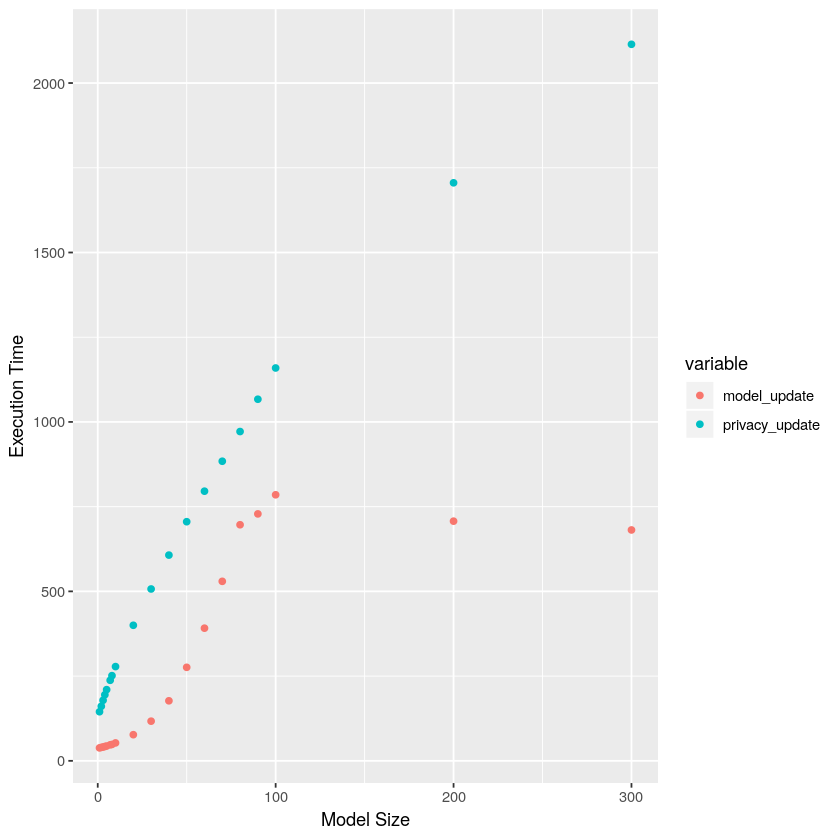

In [2]:
library(ggplot2)
library(magrittr)
library(ggpubr)
library(repr)
library(reshape2)

allColumns <- colnames(data)

measureColumns <- allColumns[c(3,5)]

ggData <- melt(data, id.vars = "index", measure.vars = measureColumns)

ggplot(ggData, aes(x=index, y=value, linetype = variable, color = variable)) + geom_point() + xlab("Model Size") + ylab("Execution Time")